# Basic Data structures
- Array
- Stack
- Queee
- Linked List: Single, Double, Circular, Double Circular
- Trees: Binary, 
- Heaps
- Hashing
- Graphs

# Dynamic Arrays: A Simple Data Structure

These notes will supplement section 17.4 of CLRS book, which covers a lot more than this chapter.


A dynamic array is simply an array but it can grow in size to accomodate new elements that are added. 

## Arrays 

An array is a "contiguous chunk" of random access memory in a computer.  
  - Random Access: We can access the individual cells of the array as `a[1]`, `a[2]`, ..., `a[n]`, where  $n$ is the size of the array. 
  - Reading or writing to the memory element at index `j`  takes $O(1)$ time. 
  
Our goal is to maintain an array of $n$ elements and support the following operations:
  - Reading/Writing to a particular index $j$ where $1 \leq j \leq n$.
  - Adding a new element at the end of the array: the size of the array will become $n+1$ as a result.
  
  
## Memory Allocator

The main difficulty in implementing an array data structure lies in how a process in a computer obtains memory. In all computer operating systems there is a memory management module that allocates memory to running programs. Programs can request a "contiguous chunk" of $k$ memory cells using an "allocation" function. This function is setup differently in various programming languages. For instance, in python, we can allocate an array of size `k` all initialized with $0$s as follows:

~~~
a = [0]* k
~~~

Note however, that lists in python are already a "dynamic array" implemented more or less in the same manner that we are going to describe here. 

https://stackoverflow.com/questions/3917574/how-is-pythons-list-implemented

The curious reader may ask about "deallocation" or "freeing" memory. We note that 
in some programming environments like C/C++ this is required for the program to explicitly tell the operating system that a particular chunk of memory that was previously allocated is no longer needed. However, python is a _garbage collected_ language. I.e, the python runtime manages memory and decides that a chunk of memory is no longer needed/can be freed. The details of garbage collection are beyond the scope of this course. 

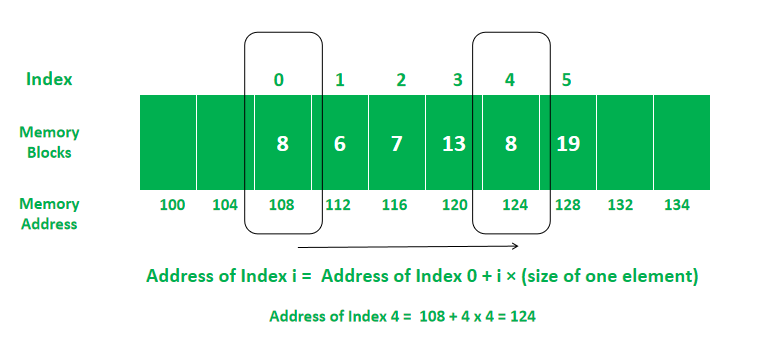

In [1]:
from PIL import Image
from IPython.display import display
img = Image.open('ArrayMemoryAllocation.png')
display(img)

In [22]:
class DynamicArray:

    def __init__(self, initial_size = 16, initial_fill = 0, flag = False):
        self.initial_fill = 0
        self.allocated_size = initial_size
        self.size = 0
        self.array = [initial_fill]*initial_size
        self.flag = flag
    
    def append(self, ell):
        '''Apend an element ell into the array. If the size of the array reach the allocated_memory size 
        then we need to access additional memory with double the size of that of the array.
        '''
        # check if we have free allocated memory to append the new element 
        if self.size >= self.allocated_size:
            # if we reach the limit of allocated memory:
            # create an empty array with double sized allocated memory, 
            # copy our current array into the new one
            # point the array attribute to the new array
            if self.flag:
                print(f'array filled all the allocated memory {self.allocated_size}, new allocated memory will be {self.allocated_size*2}')

            self.allocated_size*=2
            new_array = self.allocate_memory(self.allocated_size)
            self.copy_array(self.array, new_array)
            self.array = new_array

        # append the new element into the array, i.e. place the element to the first empty position of the array to the  
        # and increaze its size by one
        self.array[self.size] = ell 
        self.size +=1

    def allocate_memory(self, size: int) -> list:
        '''Creates an array of specified size with Null valeus, to copy the elements of the previous array that filled all its allocated memory 
        '''
        if size>=1:
            return [self.initial_fill]*size

    def copy_array(self, prev_arr, new_arr):
        '''Copy the element of the previous array to a new array with double the size'''

        if len(prev_arr) < len(new_arr):
            for i in range(len(prev_arr)):
                new_arr[i] = prev_arr[i]


    def __setitem__(self, pos, value):
        '''Allows us to set an element of the array by indexing as arr[pos] =value
        '''

        if 0<= pos < self.size:
            self.array[pos] = value

    def __getitem__(self, pos:int):
        '''Allows us to access the elements of the array by indexing
        '''

        if pos>=0:
            return self.array[pos]

    def __len__(self):
        return self.size

In [28]:
my_arr = DynamicArray(4, flag=True)

for i in range(10):
    my_arr.append(i)

print(f'Array contains the elements: {my_arr.array[:my_arr.size]}')
print(f'Array including the reserved memory cells: {my_arr.array}')
print(f'Size of the array is {my_arr.size} and the size of allocated memory is {my_arr.allocated_size}')

array filled all the allocated memory 4, new allocated memory will be 8
array filled all the allocated memory 8, new allocated memory will be 16
Array contains the elements: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Array including the reserved memory cells: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0]
Size of the array is 10 and the size of allocated memory is 16


Suppose we have appended $n$ elements so far to the array. How many times have we had to grow, assuming the initial allocated size is $1$?

- Allocated size grows from 1 to 2
- Allocated size grows from 2 to 4
- ..
- Allocated size grows from $2^{k}$ to $2^{k+1}$ where $n< 2^{k+1}$.

In other words, we grow $k+1$ times, where $2^{k} \leq n < 2^{k+1}$.
We conclude that $k = \lceil \log_2(n) \rceil$.

However, when we reallocate from size $m$ to $2m$, we have to copy over $m$ elements of the array. Therefore, the total work required to append $n$ elements is given by :

- Allocated size grows from 1 to 2 -- `1 unit of time`.
- Allocated size grows from 2 to 4 -- `2 units of time`
- ..
- Allocated size grows from $2^{k}$ to $2^{k+1}$ where $n< 2^{k+1}$ - $2^k$ ` units of time`.

Total time needed for all the reallocations: $1 + 2 + \cdots 2^k = 2^{k+1} -1  \leq  2 n -1 $.

Also, each append requires $1$ unit of time to copy the element and update the size.

Thus, adding all of it up: appending $n$ elements from scratch requires $3n$ units of time.


Appending an element in the array:
- Best, Average: $\mathcal{O}(1)$ in case the array has an empty memory cell
- Worst: $\mathcal{O}(n)$ in case the array filled of its allocated memory cell and needs to double its size
- same for auxiliary space

Accessing an element in the array by its index:
- $\mathcal{O}(1)$, since we can find the memory adrress with one arithmetic operation

### Python's Lists
- list in python behave like dynamic arrays

#### Operations on Lists
| Operation | Best, Average, Worst Time | Best, Average, Worst Space |
|----------:|-----:|------:|
| creation: l= [0]*n  | $\mathcal{O}(1)$,  $\mathcal{O}(1)$,  $\mathcal{O}(1)$ ?|$\mathcal{O}(n)$, $\mathcal{O}(n)$, $\mathcal{O}(n)$ | 
| accessing l[index] | $\mathcal{O}(1)$, $\mathcal{O}(1)$, $\mathcal{O}(1)$ |$\mathcal{O}(1)$, $\mathcal{O}(1)$, $\mathcal{O}(1)$ | 
| size: len(l)  | $\mathcal{O}(1)$, $\mathcal{O}(1)$, $\mathcal{O}(1)$ |$\mathcal{O}(1)$, $\mathcal{O}(1)$, $\mathcal{O}(1)$ | 
| l.append(ell)  | $\mathcal{O}(1)$, $\mathcal{O}(1)$, $\mathcal{O}(n)$ |$\mathcal{O}(1)$, $\mathcal{O}(1)$, $\mathcal{O}(n)$ | 
| l.insert(index, ell)  | $\mathcal{O}(1)$, $\mathcal{O}(n)$, $\mathcal{O}(n)$ |$\mathcal{O}(1)$, $\mathcal{O}(1)$, $\mathcal{O}(n)$ | 
| l.extent([0]*m)  | $\mathcal{O}(m)$, $\mathcal{O}(m)$?, $\mathcal{O}(m+n)$ |$\mathcal{O}(m)$, $\mathcal{O}(m)$?, $\mathcal{O}(n+m)$ | 
| l.remove(ell)  | $\mathcal{O}(1)$, $\mathcal{O}(n)$, $\mathcal{O}(n)$ |$\mathcal{O}(1)$, $\mathcal{O}(1)$, $\mathcal{O}(n)$ |
| l.pop(index=None)  | $\mathcal{O}(1)$, $\mathcal{O}(n)$, $\mathcal{O}(n)$ |$\mathcal{O}(1)$, $\mathcal{O}(1)$, $\mathcal{O}(n)$ |

## Stack 

A Stack is a linear data structure that follows a LIFO (Last In Last Out) principle.

In [43]:
class Stack:

    def __init__(self):
        self.stack = []
        self.size = 0
    
    def push(self, ell):
        '''Insert element ell into the stack
        '''
        self.stack.append(ell)
        self.size+=1

    def pop(self):
        '''pop and return the top element of the stack
        '''
        if self.size > 0:
            self.size-=1
            return self.stack.pop()
        
    def top(self):
        '''returns the top element of the stack
        '''

        if self.size>0:
            return self.stack[-1]

    def is_empty(self):
        '''Checks if the stack is empty
        '''

        return self.size == 0
    
    def __str__(self):
        return f'{self.stack}'

In [46]:
my_stack = Stack()
for i in range(10):
    my_stack.push(i**2)

print(f'The stack is {str(my_stack)} and has {my_stack.size} elements')
print(f'Removing the top element: {my_stack.pop()}')
print(f'Now the Top element is: {my_stack.top()}')
print(f'The stack is {str(my_stack)}')
print(f'Is the stack empty? {my_stack.is_empty()}')


The stack is [0, 1, 4, 9, 16, 25, 36, 49, 64, 81] and has 10 elements
Removing the top element: 81
Now the Top element is: 64
The stack is [0, 1, 4, 9, 16, 25, 36, 49, 64]
Is the stack empty? False


Insertion/Removal/Access on the Stack:
- $\mathcal{O}(1)$
- Auxiliary space $\mathcal{O}(1)$

## Queues

A queue is a linear data structure that follows a FIFO (First In First Out) Principle.

In [47]:
class Queue:
    '''This is an array representaion of the Queue
    '''
    
    def __init__(self, capacity):
        self.head = 0            # the position of the head, the first item
        self.tail = capacity-1   # the position of the tail, the last item
        self.size = 0            # the number of items on the list
        self.Q = [None]*capacity # the array representation of the Queue
        self.max_capacity = capacity # the maximum capacity of the Queue     
    
    def Enqueue(self, item):
        # i.e. Enter in Queue: Adds an element at the end of the queue
        if self.isFull(): 
            print('Quee is full')
            return 
        
        self.tail = (self.tail + 1) % self.max_capacity
        self.Q[self.tail] = item
        self.size+=1
    
    def Dequeue(self):
        # i.e Delete from Queue: Remove the top element of the queue
        if self.isEmpty():
            print('Queue is empty')
            return 
        
        self.Q[self.head] = None
        self.head = (self.head +1 ) % self.max_capacity
        self.size -=1
    
    def front(self):
        # returns the top element without removing it
        if self.isEmpty():
            print('Queue is empty')
            return 
        print(f'the head element is {self.Q[self.head]} at position {self.head}')
    
    def rear(self):
        # returns the last element withour removing it
        if self.isEmpty():
            print('Queue is empty')
            return 
        
        print(f'the rear element is {self.Q[self.tail]} at position {self.tail}')
      
    def isFull(self):
        # check if the queue is full
        return self.size == self.max_capacity
    
    def isEmpty(self):
        # check if the queue is empty
        return self.size == 0
    
    def __str__(self):
        return f'{self.Q}'

In [48]:
my_queue = Queue(6)
for i in range(4):
    my_queue.Enqueue(i**2)
print(str(my_queue))
my_queue.front()
my_queue.rear()
my_queue.isEmpty()
my_queue.isFull()
my_queue.Dequeue()
print(str(my_queue))

[0, 1, 4, 9, None, None]
the head element is 0 at position 0
the rear element is 9 at position 3
[None, 1, 4, 9, None, None]


- all operations are $\mathcal{O}(1)$
- auxiliary space is $\mathcal{O}(n)$

### Single linked list

- A Single linked list is a linear data structure that is made of nodes  
- Each node hold somde data, and a pointer to the next node. 
- The size of the linked list is not fixed, but it consumes exta memory since pointers are also stored
- The first node is called head, and the last node points to None.
- To implement a linked list we use Nested Composition 

In [5]:
class Node:
    
    def __init__(self, data):
        self.data = data 
        self.next = None   

class SingleLinkedList:

    def __init__(self):
        self.head = None

    def add_node(self, data, pos=None, end=False):
        '''Add node to the list.
        If no position is provided insert the node at the beggining
        If end=True insert the node at posiiton pos from the end
        '''
        
        if pos == None:
            pos = 0 
        elif type(pos)==int:
            length = len(self)
            pos = pos % length

        if end:
            length = len(self)
            pos = length- pos

        # if no position is provided add it at the beggining
        if pos==0:
            node = Node(data)
            node.next = self.head
            self.head = node
            return

        pointer = self.head
        for i in range(pos-1):
            pointer = pointer.next
            # return if the position exceeds the length of the list
            if pointer == None:
                return
        # here pointer points to the node before the position
        node = Node(data)
        node.next = pointer.next 
        pointer.next = node

    # def add_node_after_value(self, data, value):
    #     ''' Adding a node with data after the node with data = value 
    #     by traversing the list
    #     '''

    #     pointer = self.head
    #     # traverse the list until we find the node with data = value
    #     while pointer.data != value:
    #         pointer = pointer.next
        
    #     # if no such node return
    #     if pointer == None:
    #         return
        
    #     # here the pointer is at the node with data = value
    #     # point also the next node of the pointer
    #     next_pointer = pointer.next
    #     # create a new node
    #     node = Node(data)
    #     # point the pointer to the new node and the new node to the next_pointer
    #     pointer.next = node
    #     node.next = next_pointer
        
    #     return
    
    def traverse_list(self):
        ''''Traverse the linked list and return an array (list) with the stored data.
        If the list is empty return an empty list.
        '''
        
        arr = []

        pointer = self.head
        while pointer != None:
            arr.append(pointer.data)
            pointer = pointer.next

        return arr
    
    def search(self, value):
        '''Search the list if a node with data = value exist.
        Return True or False.
        '''

        pointer = self.head
        # traverse the list until the pointer finds the node with data = value
        while pointer != None:
            if pointer.data == value:
                return True
            pointer = pointer.next
        
        return False
    
    def delete(self, pos: int =None):
        '''Delete node at position pos.
        If no pos is provided it deletes the first node in the list.
        '''
        
        # if the list is empty return 
        if self.head == None:
            return
        
        # if no position is provided, or pos=0, delete the head node, point the head to the next node
        if not pos:
            pointer = self.head
            self.head = pointer.next 
        
        if type(pos) == int and pos>0:
            pointer = self.head
            for i in range(pos-1):
                pointer = pointer.next
                # return if the position exceeds the length of the list
                if pointer == None:
                    return
            # here pointer points to the node before the position
            node_to_delete = pointer.next
            pointer.next = node_to_delete.next
            del node_to_delete
        
        return

    def __len__(self):
        pointer = self.head
        l = 0
        while pointer != None:
            l+=1
            pointer = pointer.next

        return l 


In [6]:
linked_list = SingleLinkedList()
for i in range(10):
    linked_list.add_node(i**2)
print(linked_list.traverse_list())
linked_list.add_node(-10, end=True)
# linked_list.add_node_after_value(-100, 9)
print(linked_list.traverse_list())
print(f'is 3 on the list? {linked_list.search(3)}', f'is 4 on the list? {linked_list.search(4)}', sep='\n')
print(f'Length of list: {len(linked_list)}')
linked_list.delete()
linked_list.delete(pos=0)
print(linked_list.traverse_list())
linked_list.delete(pos=2)
linked_list.delete(pos=100)
print(linked_list.traverse_list())
linked_list.add_node(1000, pos=2)
print(linked_list.traverse_list())

[81, 64, 49, 36, 25, 16, 9, 4, 1, 0]
[81, 64, 49, 36, 25, 16, 9, 4, 1, 0, -10]
is 3 on the list? False
is 4 on the list? True
Length of list: 11
[49, 36, 25, 16, 9, 4, 1, 0, -10]
[49, 36, 16, 9, 4, 1, 0, -10]
[49, 36, 1000, 16, 9, 4, 1, 0, -10]


- Insertion
  - Beggining: time, space $\mathcal{O}(1)$
  - End: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
  - After node with specific value: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Deletion at position: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Traverse: time $\mathcal{O}(n)$, space $\mathcal{O}(n)$ (if we store the values)
- Search an element:  time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Access element by position: time $\mathcal{O}(n)$, since we need to traverse the list until that position
- length: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$

## Double Linked List

- double linked lists are similar to single linked list
- each node has two pointer, one to the next node and one to the previous

In [7]:
class Node:

    def __init__(self, data):
        self.data = data
        self.next = None
        self.previous = None

class DoubleLinkedList(SingleLinkedList):
    
    SingleLinkedList().__init__()

    def add_node(self, data):
        node = Node(data)
        node.next = self.head

        if self.head !=None:
            self.head.previous = node
        
        self.head = node

    def delete(self):

        if self.head == None:
            return
        
        node = self.head
        self.head = node.next
        if self.head != None:
            self.head.previous = None
        
        del node

In [13]:
linked_list = DoubleLinkedList()
for i in range(10):
    linked_list.add_node(i**2)
print(linked_list.traverse_list())
linked_list.add_node(-10)
print(linked_list.traverse_list())
print(f'is 3 on the list? {linked_list.search(3)}', f'is 4 on the list? {linked_list.search(4)}', sep='\n')
print(f'Length of list: {len(linked_list)}')
linked_list.delete()
linked_list.delete()
print(linked_list.traverse_list())
linked_list.add_node(1000)
print(linked_list.traverse_list())
node = linked_list.head.next
while node.next !=  None:
    print(f'Node {node.data}, previous node: {node.previous.data}, next node: {node.next.data}')
    node = node.next

[81, 64, 49, 36, 25, 16, 9, 4, 1, 0]
[-10, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0]
is 3 on the list? False
is 4 on the list? True
Length of list: 11
[64, 49, 36, 25, 16, 9, 4, 1, 0]
[1000, 64, 49, 36, 25, 16, 9, 4, 1, 0]
Node 64, previous node: 1000, next node: 49
Node 49, previous node: 64, next node: 36
Node 36, previous node: 49, next node: 25
Node 25, previous node: 36, next node: 16
Node 16, previous node: 25, next node: 9
Node 9, previous node: 16, next node: 4
Node 4, previous node: 9, next node: 1
Node 1, previous node: 4, next node: 0


- Insertion
  - Beggining: time, space $\mathcal{O}(1)$
  - End: time $\mathcal{O}(1)$, space $\mathcal{O}(1)$
  - After node with specific value: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Deletion at position: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Traverse: time $\mathcal{O}(n)$, space $\mathcal{O}(n)$ (if we store the values)
- Search an element:  time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Access element by position: time $\mathcal{O}(n)$, since we need to traverse the list until that position
- length: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$

## Circular Linked List
- a circular linked list is a linked list in which the last node of the list does not point to Null but back to the head node of the list forming a cycle

In [67]:
class Node:

    def __init__(self, data):
        self.data = data
        self.next = None

class CircularLinkedList:

    def __init__(self):
        self.head = None
    
    def add_node(self, data):
        '''add a new node at the beggining
        '''
        
        # create a new node
        node = Node(data)

        # if the list is empty point the head to the node, point the node to itself
        if self.head == None:
            self.head = node
            node.next = node
            return
        
        # point the node to the head
        node.next = self.head
        
        # find the last node of the list
        next_node = self.head.next
        while next_node.next != self.head:
            next_node = next_node.next
        # point the last node to the new node
        next_node.next = node
        # point the head to the new node
        self.head = node

    def delete(self):
        '''Delete the head node
        '''
        
        # list is empty
        if self.head == None:
            return
        
        # list has only one node
        if self.head.next == self.head:
            self.head = None
            return
        
        # list has at least two nodes; find the last node
        next_node = self.head.next
        while next_node.next != self.head:
            next_node = next_node.next

        # here next_node is the last node
        # point the last node to the node after the head
        next_node.next = self.head.next
        # point the head to that node as well
        self.head = next_node.next
        
    def traverse_list(self):

        arr = []

        if self.head == None:
            return arr

        pointer = self.head
        arr.append(pointer.data)
        while pointer.next != self.head:
            pointer = pointer.next
            arr.append(pointer.data) 

        return arr
    
    def __len__(self):

        if self.head == None:
            return 0

        pointer = self.head
        length = 1
        while pointer.next != self.head:
            pointer = pointer.next
            length += 1
        
        return length
        

In [68]:
circular_list = CircularLinkedList()
for i in range(10):
    circular_list.add_node(i**2)

print(circular_list.traverse_list())
circular_list.delete()
print(circular_list.head.data)
circular_list.delete()
print(circular_list.traverse_list())
head = circular_list.head
node = circular_list.head
while node.next!= head:
    print(f'Node {node.data}, next node: {node.next.data}')
    node = node.next
print(f'Node {node.data}, next node: {node.next.data}')
print(f'length of list: {len(circular_list)}')

[81, 64, 49, 36, 25, 16, 9, 4, 1, 0]
64
[49, 36, 25, 16, 9, 4, 1, 0]
Node 49, next node: 36
Node 36, next node: 25
Node 25, next node: 16
Node 16, next node: 9
Node 9, next node: 4
Node 4, next node: 1
Node 1, next node: 0
Node 0, next node: 49
length of list: 8


- Insertion at Beggining: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$, since we need to traverse the list to reach the last element and point it to the new node, if we keep the tail of the list then it is $\mathcal{O}(1)$
- Deletion at Beggining: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Traverse: time $\mathcal{O}(n)$, space $\mathcal{O}(n)$ (if we store the values)
- Search an element:  time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Access element by position: time $\mathcal{O}(n)$, since we need to traverse the list until that position
- length: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$

## Double Circular Linked List
- a circulat linked list that each node points to the next and the previous node

In [70]:
# 23/5/24, those are wrong; we can immediatly find the last element.

class Node:

    def __init__(self, data):
        self.data = data
        self.previous = None
        self.next = None

class DoubleCircularLinkedList:

    def __init__(self):
        self.head = None
    
    def add_node(self, data):
        '''Insert a node at the beggining
        '''
        
        node = Node(data)
        
        # if the list is empty
        if self.head == None:
            self.head = node
            node.next = node
            node.previous = node
            return
        
        # point the node to the head
        node.next = self.head
        
        # find the last node of the list
        next_node = self.head.next
        while next_node.next != self.head:
            next_node = next_node.next
        
        # point the last node to the new node
        next_node.next = node
        # point the new node previous to the last node
        node.previous = next_node
        # point the head previous to the new node
        self.head.previous = node
        # point the head to the new node
        self.head = node

    def delete(self):
        '''Delete the head node
        '''
        
        # list is empty
        if self.head == None:
            return
        
        # list has only one node point head to None
        if self.head.next == self.head:
            self.head = None
            return
        
        # list has at least two nodes; find the last node
        next_node = self.head.next
        while next_node.next != self.head:
            next_node = next_node.next

        # here next_node is the last node
        # point the last node to the node after the head
        next_node.next = self.head.next
        # point the node after the head previous to the last node
        self.head.next.previous = next_node
        # point the head to the node after the head to delete
        self.head = next_node.next

    def traverse_list(self):

        arr = []

        if self.head == None:
            return arr

        pointer = self.head
        arr.append(pointer.data)
        while pointer.next != self.head:
            pointer = pointer.next
            arr.append(pointer.data) 

        return arr
    
    def __len__(self):

        if self.head == None:
            return 0

        pointer = self.head
        length = 1
        while pointer.next != self.head:
            pointer = pointer.next
            length += 1
        
        return length
        

In [76]:
circular_list = DoubleCircularLinkedList()
for i in range(10):
    circular_list.add_node(i**2)

print(circular_list.traverse_list())
circular_list.delete()
circular_list.delete()
print(circular_list.traverse_list())
head = circular_list.head
node = circular_list.head
while node.next!= head:
    print(f'Node {node.data}, next node: {node.next.data}, previous node: {node.previous.data}')
    node = node.next
print(f'Node {node.data}, next node: {node.next.data}, previous node: {node.previous.data}')
print(f'length of list: {len(circular_list)}')

[81, 64, 49, 36, 25, 16, 9, 4, 1, 0]
[49, 36, 25, 16, 9, 4, 1, 0]
Node 49, next node: 36, previous node: 0
Node 36, next node: 25, previous node: 49
Node 25, next node: 16, previous node: 36
Node 16, next node: 9, previous node: 25
Node 9, next node: 4, previous node: 16
Node 4, next node: 1, previous node: 9
Node 1, next node: 0, previous node: 4
Node 0, next node: 49, previous node: 1
length of list: 8


- Insertion at Beggining: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$, since we need to traverse the list to reach the last element and point it to the new node, if we keep the tail of the list then it is $\mathcal{O}(1)$
- Deletion at Beggining: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Traverse: time $\mathcal{O}(n)$, space $\mathcal{O}(n)$ (if we store the values)
- Search an element:  time $\mathcal{O}(n)$, space $\mathcal{O}(1)$
- Access element by position: time $\mathcal{O}(n)$, since we need to traverse the list until that position
- length: time $\mathcal{O}(n)$, space $\mathcal{O}(1)$

### Queue implementation using a linked list

In [3]:
class Node:

    def __init__(self, data):
        self.data = data
        self.next = None

class Queue:
    '''A linkied list implementation of a Queue
    '''

    def __init__(self):
        self.head = None
        self.tail = None

    def enqueue(self, data):
        '''Enter a new element into the queue
        '''

        # create a node
        node = Node(data)
        # if the node is empty the head and the tail should referrence to the same node-object
        # the next node remeains None
        if self.is_empty():
            self.head = self.tail = node
            return
        # if there is a tail set its next attribute to point to the new tail-node 
        # and then set the tail attribute to point to the new tail-object 
        self.tail.next = node
        self.tail = node


    def dequeue(self):
        '''Remove the first element (head) of the queue
        '''

        # return if the queue is empty
        if self.is_empty():
            return
        
        # point the head to the next element
        self.head = self.head.next
        
        # if there is no element left point also the tail to None
        if self.head == None:
            self.tail = None
    
    def is_empty(self):
        return self.head == None
        

In [4]:
q = Queue()
q.enqueue(10)
q.enqueue(20)
q.dequeue()
q.dequeue()
q.enqueue(30)
q.enqueue(40)
q.enqueue(50)
q.dequeue()
print("Queue Head : " + str(q.head.data if q.head != None else -1))
print("Queue Tail : " + str(q.tail.data if q.tail != None else -1))

Queue Head : 40
Queue Tail : 50


- all operations are $\mathcal{O}(1)$
- auxiliary space is $\mathcal{O}(1)$

### Python's Collections Module

The collections module in python contains the following data structures:
- namedtuples()
- deque
- Chainmap
- Counter
- orderedDict
- defaultdict
- UserDict
- UserList
- UserString


### DeQueue

- dequeue is a double ended queue such that insertion and deletion can be performed from both ends
- in python's collection module dequeue object represents a double ended queue
- python dequeue is prefered over python list where we need fast $\mathcal{O}(1)$ append and pop operations from both ends
- dequeue is implemented similar to a double linked list that keeps the head and the tail (my assumption)

#### Operations on dequeue
| Operation | Best, Average, Worst Time | Best, Average, Worst Space |
|----------:|-----:|------:|
| creation: q= deque(iterable[, maxlen])  | $\mathcal{O}(n)$|$\mathcal{O}(n)$ | 
| accessing: q[index] | $\mathcal{O}(1)$(at ends), $\mathcal{O}(n)$, $\mathcal{O}(n)$ |$\mathcal{O}(1)$ | 
| size: len(q)  | $\mathcal{O}(1)$ (stores it) | $\mathcal{O}(1)$ | 
| q.append(ell)  | $\mathcal{O}(1)$ |$\mathcal{O}(1)$ | 
| q.appendleft(ell)  | $\mathcal{O}(1)$ |$\mathcal{O}(1)$ | 
| q.pop()  | $\mathcal{O}(1)$ |$\mathcal{O}(1)$|
| q.popleft()  | $\mathcal{O}(1)$ |$\mathcal{O}(1)$|
| q.index(ell)  | $\mathcal{O}(n)$ |$\mathcal{O}(1)$|
| q.insert(index, ell)  | $\mathcal{O}(1)$(at ends), $\mathcal{O}(n)$, $\mathcal{O}(n)$ |$\mathcal{O}(1)$ | 
| q.extent(iterable)  | $\mathcal{O}(m)$|$\mathcal{O}(m)$| 
| q.extentleft(iterable)  | $\mathcal{O}(m)$|$\mathcal{O}(m)$| 
| q.remove(ell)  | $\mathcal{O}(1)$, $\mathcal{O}(n)$, $\mathcal{O}(n)$ |$\mathcal{O}(1)$|
| q.rotate(m)  | $\mathcal{O}(m)$|$\mathcal{O}(1)$| 
| q.count()  | $\mathcal{O}(n)$|$\mathcal{O}(1)$| 
| q.reverse()  | $\mathcal{O}(n)$|$\mathcal{O}(1)$|


In [32]:
# python dequeue object from 
from collections import deque
# create a deque
n=10
q=deque()
# can append elements to the right or left in O(1) time
for i in range(n):
    q.append(i) if i%2==0 else q.appendleft(i)
print(q)

# can pop elements to the left or right in O(1) time; pop does NOT take argument
q.pop()
q.popleft()
print(q)

# access elements by index in O(n) time
print(f'2nd element in q: {q[1]}, 2nd from the end: {q[-2]}')

# it is iterable
for i, ell in enumerate(q, start=1):
    print(f'{i} element of q: {ell}')

# insert elements
q.insert(3,100)
q.extend([-10,-9,-8])
q.extendleft([10,9,8]) # append item left in reversed order!
print(q)

# rotate the q to the right
q.rotate()
print(q)


deque([9, 7, 5, 3, 1, 0, 2, 4, 6, 8])
deque([7, 5, 3, 1, 0, 2, 4, 6])
2nd element in q: 5, 2nd from the end: 4
1 element of q: 7
2 element of q: 5
3 element of q: 3
4 element of q: 1
5 element of q: 0
6 element of q: 2
7 element of q: 4
8 element of q: 6
deque([8, 9, 10, 7, 5, 3, 100, 1, 0, 2, 4, 6, -10, -9, -8])
deque([-8, 8, 9, 10, 7, 5, 3, 100, 1, 0, 2, 4, 6, -10, -9])
